<a href="https://colab.research.google.com/github/sgr1118/PyTorch/blob/main/Chapter12_%EC%98%A4%EB%B2%84%ED%94%BC%ED%8C%85%EC%9D%84_%EB%B0%A9%EC%A7%80%ED%95%98%EB%8A%94_%EB%B0%A9%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 12.1 모델 평가하기
- 11장에서 ML 프로세스를 보았다. 하지만 이 방법은 수집된 데이터에서만 잘 작동하는 오버피팅에 빠질 수 있다. 이 장에서는 오버피팅을 피하는 방법에 대하여 설명한다.

### 1. 좋은 평가란?
- 학습이 완료된 모델을 서비스할 때 모델이 학습한 데이터와 다른 성질을 갖는 데이터를 받을 경우도있다. 이런 경우 모델이 잘 작동하지 않을 수 있기 때문에 잘 준비된 데이터 셋을 통해 객관적인 평가를 수행하는 것이 중요하다.

### 2. 정성평가와 정량평가
|방법|장점|특징|
|-|-|-|
|정성평가|정확함|사람에 의한 채점 방식으로 채점 기준이 모호한 경에 필수|
|정령평가|빠르고 저렴|컴퓨터에 의한 자동 채점, 정성평가와 비슷할수록 좋은 알고리즘|

### 3. 실무에서 평가가 진행되는 과정의 예
- 1. 학습이 완료된 모델에 테스트 데이터셋을 넣어 추론 수행
- 2. 또한 동일한 테스트 데이터셋을 다른 베이스라인 모델에 넣어 수행, 경쟁사 서비스에 직접 데이터를 넣어 결과를 얻어 올 수 있다.
- 3. 채점 기준이 모호하다면 정성평가를 수행한다. 중요한 것은 누가 어떻게 평가했는지 블라인드 테스트를 수행
- 4. 미리 잘 정의된 정성평가 기준에 따라 평가가 완료되면 결과를 취합
- 정성평가는 오래 걸리기 때문에 작은 개선 사항은 정량평가를 통해 평가한다.

## 12.2 오버피팅이란?

### 1. 목표 수정
- 실제로 데이터를 수집할 때 크롤링 또는 사람이 직접 레이블링을 한다. 이 과정에서 실수가 발생할 수 있다. 이런 잘못된 레이블링 데이터를 모델이 학습하면 실제 서비스에서 오류가 발생할 것이다. 그래서 최종 목표는 일반화 오차를 최소화하는 것이다.

### 2. 오버피팅과 언더피팅
|이름|개념|
|-|-|
|오버피팅|학습 오차가 일반화 오차에 비해서 낮아지는 현상|
|언더피팅|모델이 충분히 학습하지 못하여 학습 오차가 충분히 낮지 않은 현상|

![](https://wikidocs.net/images/page/152777/overfit.JPG)
<center>오버피팅과 언더피팅</center>

### 3. 검증 데이터셋
- 학습 데이터의 불필요한 특징까지 학습되는 순간이 올텐데 이것을 잘 감지하기위해 검증 데이터셋을 도입한다. 주기적으로 모델에 넣어 손실 값을 구현함으로써 오버피팅 여부를 확인할 수 있다. 또한 검증 데이터셋에 대한 손실 값을 검증 손실 값이라고 부른다

- 중요한 것은 검증 데이터셋을 통해서는 최적화(학습)를 진행하지 않으며, 데이터셋을 랜덤하게 나누는 과정에서 편향이 있어서는 안된다.

### 4. 모델 학습 과정 정리
![](https://blog.kakaocdn.net/dn/cyrOwE/btrwsIAFk1i/HoKGb89UetxRnmYHehgtS0/img.png)
<center>학습 손실과 검증 손실</center>

- 검증 과정에는 손실 값을 계산하지만 역전파 계산과 경사하강법 수행이 없다. 또한 검증 이후에는 현재 에포크의 검증 손실 값이 학습 손실값이 기존보다 더 낮아졌는지 확인을 통해 오버피팅 여부를 체크할 수 있다. 학습이 종료된 이후에는 가장 낮은 검증 손실 값을 갖는 모델을 복원하여 근사 함수로 활용할 수 있을 것이다.

## 12.3 테스트셋 구성하기

### 1. 테스트셋의 필요성
- 검증 데이터를 사용하여 최종 평가를 해버리면 이미 모델에게 노출한 것이나 다름 없다. 즉 오버피팅이 된다.

### 2. 데이터 나누기
- 최종적으로 학습, 검증, 테스트 데이터 셋을 구분지어야한다. 보통 비율은 8:1:1 또는 6:2:2가 되도록 구성한다.

### 정리
||Train set|Valid set|Test set|
|-|-|-|-|
|Parameter|결정|검증|검증|
|Hyper-parameter||결정|검증|
|Algorithm|||결정|

## 12.4 데이터 나누기

### 1. 데이터 준비
- 기존에 모든 데이터를 학습하는 방식인 아닌 데이터 나누기를 통하여 모델의 출력 결과를 알아본다.

In [1]:
# 라이브러리 불러오기

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 데이터 셋 불러오기

from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

#print(cancer.DESCR)

# 보스턴 데이터 df

df = pd.DataFrame(california.data, columns = california.feature_names)
df['TARGET'] = california.target

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Numpy 데이터를 파이토치 실수형 텐서로 변환

data = torch.from_numpy(df.values).float()

# 입력 x와 출력 y로 나눈기

x = data[:, :-1]
y = data[:, -1:]
print(x.shape, y.shape)

# 데이터 셋 나누기
ratios = [.6, .2, .2] 

train_cnt = int(data.size(0) * ratios[0])
valid_cnt = int(data.size(0) * ratios[1])
test_cnt = data.size(0) - (train_cnt + valid_cnt)
cnts = [train_cnt, valid_cnt, test_cnt]

print('Train %d / Valid %d / Test %d samples.' %(train_cnt, valid_cnt, test_cnt))

torch.Size([20640, 8]) torch.Size([20640, 1])
Train 12384 / Valid 4128 / Test 4128 samples.


In [3]:
# x, y 랜덤 샘플링 수행

indices = torch.randperm(data.size(0))

x = torch.index_select(x, dim = 0, index = indices)
y = torch.index_select(y, dim = 0, index = indices)

# 각자 할당된 개수만큼 데이터 나누기
x = list(x.split(cnts, dim=0))
y = y.split(cnts, dim=0)

for x_i, y_i in zip(x, y):
    print(x_i.size(), y_i.size())

torch.Size([12384, 8]) torch.Size([12384, 1])
torch.Size([4128, 8]) torch.Size([4128, 1])
torch.Size([4128, 8]) torch.Size([4128, 1])


- 이번 장에서 정규화를 늦게 한 이유는 데이터셋 피팅 작업이 필요하기 때문이다. 표준 스케일링은 데이터셋 각 열의 분포를 추정하고 추정된 평균과 표준편차를 활용하여 표준정규분포로 변환한다.

- 만약 모든 데이터셋 합쳐진 상태에서 정규화를하면 정답을 보는 것과 같다. 물론 매우 큰 데이터셋은 데이터 분리를 하여도 분포가 유사하겠지만 그렇다고해서 모든 데이터셋이 합쳐져있을때 평균과 표준편차를 추정해도 되는 것은 아니다.

In [4]:
# 데이터 셋 정규화

scaler = StandardScaler()
scaler.fit(x[0].numpy()) # 반드시 학습 데이터만 정규화

x[0] = torch.from_numpy(scaler.transform(x[0].numpy())).float()
x[1] = torch.from_numpy(scaler.transform(x[1].numpy())).float()
x[2] = torch.from_numpy(scaler.transform(x[2].numpy())).float()

### 2. 학습 코드 구현

- DNN을 nn.Sequential로 정의한다.

In [5]:
# nn.Sequential

model = nn.Sequential(
    nn.Linear(x[0].size(-1), 6), # 첫 번째 선형 계층의 크기 8
    nn.LeakyReLU(),
    nn.Linear(6,5),
    nn.LeakyReLU(),
    nn.Linear(5,4),
    nn.LeakyReLU(),
    nn.Linear(4,3),
    nn.LeakyReLU(),
    nn.Linear(3, y[0].size(-1)) # 마지막 선형 계층의 크기 1
)

# optimizer 선언
# 별도로 학습률은 넣어주지 않는다.

optimizer = optim.Adam(model.parameters())

# 학습에 필요한 설정값을 정한다.

n_epochs = 4000
batch_size = 256
print_interval = 100

In [6]:
# 검증 손실 기록하기
import numpy as np
from copy import deepcopy

lowest_loss = np.inf # 최저 검증 손길을 추적하기 위한 변수
best_model = None # 최저 검증 손길 값을 뱉어낸 모델을 저장하기 위한 변수

early_stop = 100 # 학습 조기 종료 세팅 값
lowest_epoch = np.inf # 가장 낮은 검증 손실을 뱉어낼 에포크를 저장하기 위한 변수

In [7]:
# 학습 수행
# 앞서 코드와 다른점 : for문 후반부에 검증 작업을 위한 코드가 추가되었다는 것이다.

train_history, valid_history = [] ,[]

for i in range(n_epochs):
    # Shuffle the index to feed-forward
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim = 0, index = indices)
    y_ = torch.index_select(y[0], dim = 0, index = indices)

    x_ = x_.split(batch_size, dim = 0)
    y_ = y_.split(batch_size, dim = 0)

    train_loss, valid_loss = 0, 0
    y_hat = []
    
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.mse_loss(y_hat_i, y_i)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        train_loss += float(loss) # 메모리 부족을 방지하기 위하여 중요한 부분이다.
    
    train_loss = train_loss / len(x_)

# 검증 데이터셋 사용하기
# 검증 과정에서는 그래디언트 계산이 필요없기 때문에 torch.no_grad()를 사용하여 with내부에서 검증 작업을 진행

    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)

        valid_loss = 0
        
        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = F.mse_loss(y_hat_i, y_i)

            valid_loss += loss

            y_hat += [y_hat_i]

    valid_loss = valid_loss / len(x_)

    # 교육이 완료된 후 플롯에 각 손실을 기록합니다

    train_history += [train_loss]
    valid_history += [valid_loss]

    if (i+1) % print_interval == 0:
        print('Epoch %d: train_loss=%.4e valid_loss=%.4e lowest_loss = =%.4e' % (i+1, 
                                                                                 train_loss,
                                                                                 valid_loss,
                                                                                 lowest_loss))
    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        
        best_model = deepcopy(model.state_dict())
    
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i+1:
            print('%d epoch 이후 더 이상의 개선은 필요 없다.' % early_stop)
            break

print('%d 에포크가 가장 낮은 검증 손실이다. : %.4e' % (lowest_epoch + 1, lowest_loss))

# best model 저장

model.load_state_dict(best_model)

Epoch 100: train_loss=3.6840e-01 valid_loss=3.8777e-01 lowest_loss = =3.8700e-01
Epoch 200: train_loss=3.4875e-01 valid_loss=3.6070e-01 lowest_loss = =3.5776e-01
Epoch 300: train_loss=3.4602e-01 valid_loss=3.5494e-01 lowest_loss = =3.5496e-01
Epoch 400: train_loss=3.4643e-01 valid_loss=3.5560e-01 lowest_loss = =3.5322e-01
100 epoch 이후 더 이상의 개선은 필요 없다.
381 에포크가 가장 낮은 검증 손실이다. : 3.5322e-01


<All keys matched successfully>

### 3. 손실 곡선 확인
- 교재와 조금 다른 결과이지만 valid_loss가 train_loss보다 더 낮은 경우도 있다. 이런 경우는 우연히 검증 데이터셋이 좀 더 쉽게 구성이 된 경우이며 학습 데이터셋에 비하여 손실 값이 낮을 수도 있다.

- 또한 후반부로 갈수록 각 손실 값차이가 조금씩 줄어드는 것을 볼 수 있다. 모델이 학습 데이터에만 존재하는 특성을 학습하는 과정이라고도 볼 수 있다. 하지만 검증 손실값도 천천히 감소하고 있는 상황이므로 오버 피팅에 접어들었다고 볼 수는 없다.

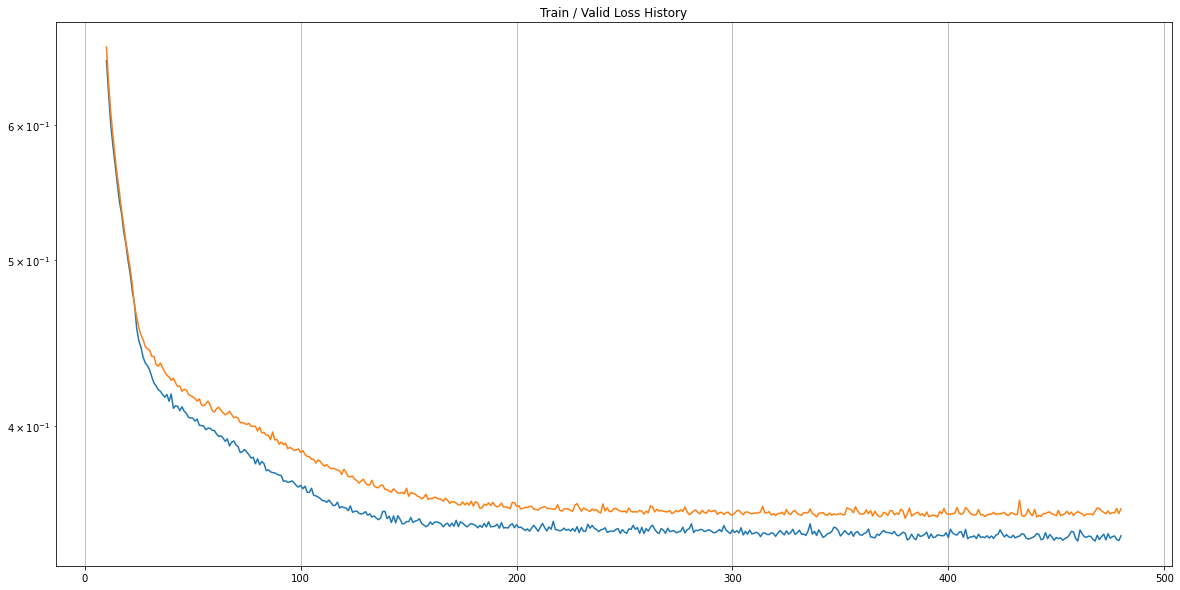

In [8]:
plot_from = 10

plt.figure(figsize=(20,10))
plt.grid('grid') # grid 추가
plt.title('Train / Valid Loss History')
plt.plot(
    range(plot_from, len(train_history)), train_history[plot_from:],
    range(plot_from, len(valid_history)), valid_history[plot_from:],)

plt.yscale('log')
plt.show()

### 4. 결과 확인

In [9]:
test_loss = 0
y_hat = []

with torch.no_grad():
    x_ = x[2].split(batch_size, dim = 0)
    y_ = y[2].split(batch_size, dim = 0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.mse_loss(y_hat_i, y_i)

        test_loss += loss
        y_hat += [y_hat_i]

test_loss = test_loss / len(x_)
y_hat = torch.cat(y_hat, dim = 0)

sortd_history = sorted(zip(train_history, valid_history), key = lambda x: x[1])

print('Train_loss : %.4e' % sortd_history[0][0])
print('Valid_loss : %.4e' % sortd_history[0][1])
print('Test_loss : %.4e' % test_loss)

Train_loss : 3.4620e-01
Valid_loss : 3.5322e-01
Test_loss : 3.4473e-01


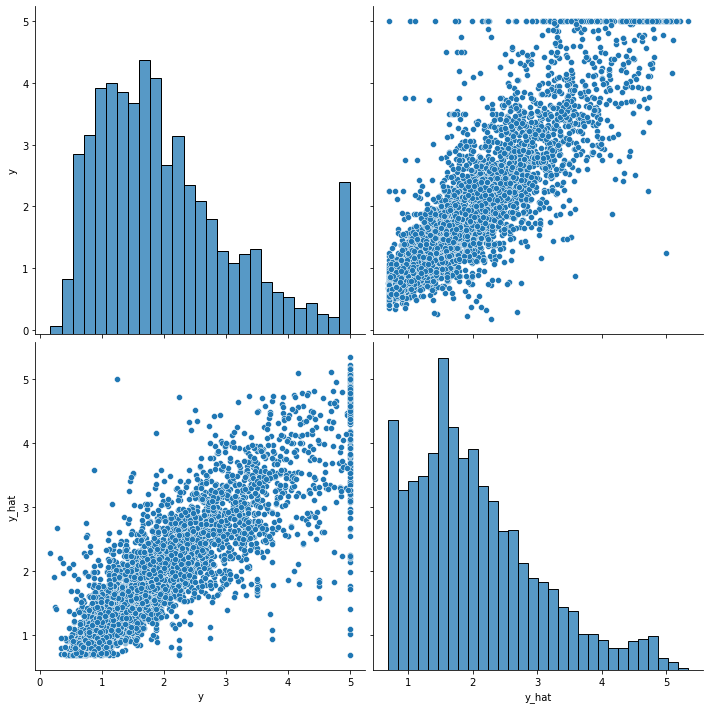

In [10]:
df = pd.DataFrame(torch.cat([y[2], y_hat], dim = 1).detach_().numpy(),
                  columns = ['y', 'y_hat'])

sns.pairplot(df, height = 5)
plt.show()

# 실제 값과 유사한 분포를 보여주고있다.

## 12.5 마치며

### 요약

1. 평가

|방법|장점|특징|
|-|-|-|
|정성평가|정확함|사람에 의한 채점 방식으로 채점 기준이 모호한 경에 필수|
|정령평가|빠르고 저렴|컴퓨터에 의한 자동 채점, 정성평가와 비슷할수록 좋은 알고리즘|

2. 오버피팅/언더피팅

|이름|개념|
|-|-|
|오버피팅|학습 오차가 일반화 오차에 비해서 낮아지는 현상|
|언더피팅|모델이 충분히 학습하지 못하여 학습 오차가 충분히 낮지 않은 현상|

3. 데이터 분할
 - 사용자가 임의로 데이터셋 분할 비율을 정하여 학습과 평가를 수행 (대부분 8:1:1 또는 6:2:2)
 - 데이터를 분할한 이후 학습 데이터를 기준으로 각 데이터셋에 대해 전처리를 수행